In [64]:
'''
DESCRIPTION

Project Objective: 
Design an algorithm which will tell the fare to be charged for a passenger.

Problem Statement Scenario: 
A fare calculator helps a customer in identifying the fare valid for the trip. They are often used by passengers who are new to a city or tourists to get an estimate of travel costs.
You are provided with a dataset with features like fare amount, pickup and drop location, passenger count, and so on.
Following actions should be performed:
    • Understand the type of data.
    • Identify the output variable.
    • Identify the factors which affect the output variable.
    • Check if there are any biases in your dataset.
    • Count the null values existing in columns.
    • Remove the null value rows in the target variable.
    • Perform train test split.
    • Predict the accuracy using regression models.
    • Check and compare the accuracy of the different models.
'''

'\nDESCRIPTION\n\nProject Objective: \nDesign an algorithm which will tell the fare to be charged for a passenger.\n\nProblem Statement Scenario: \nA fare calculator helps a customer in identifying the fare valid for the trip. They are often used by passengers who are new to a city or tourists to get an estimate of travel costs.\nYou are provided with a dataset with features like fare amount, pickup and drop location, passenger count, and so on.\nFollowing actions should be performed:\n    • Understand the type of data.\n    • Identify the output variable.\n    • Identify the factors which affect the output variable.\n    • Check if there are any biases in your dataset.\n    • Count the null values existing in columns.\n    • Remove the null value rows in the target variable.\n    • Perform train test split.\n    • Predict the accuracy using regression models.\n    • Check and compare the accuracy of the different models.\n'

In [65]:
#importing uber dataset--loading top 1,000,000 rows
import pandas as pd
uber_df=pd.read_csv('E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Course End Projects/Project 9.1 - Uber Fare Prediction/Dataset for the project/train.csv',nrows=1000000)
uber_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [66]:
#Exploring dataset--Data Preprocessing
uber_df.info()
#Fare_amount is the target variable
#Key column is not useful for our analysis
#Date, pickup and drop Locations and passenger count can be used as predictor variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [67]:
#Dropping the key column
uber_df.drop(['key'],axis=1,inplace=True)
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1000000 non-null  float64
 1   pickup_datetime    1000000 non-null  object 
 2   pickup_longitude   1000000 non-null  float64
 3   pickup_latitude    1000000 non-null  float64
 4   dropoff_longitude  999990 non-null   float64
 5   dropoff_latitude   999990 non-null   float64
 6   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 53.4+ MB


In [68]:
#Checking for NULL values
uber_df.isna().sum()
#drop location has 10 null values. since there are only 10 null values, we can drop them

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [69]:
#Deleting rows with null values
uber_df.dropna(axis=0,inplace=True)
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        999990 non-null  float64
 1   pickup_datetime    999990 non-null  object 
 2   pickup_longitude   999990 non-null  float64
 3   pickup_latitude    999990 non-null  float64
 4   dropoff_longitude  999990 non-null  float64
 5   dropoff_latitude   999990 non-null  float64
 6   passenger_count    999990 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [70]:
uber_df.describe()
#Observations:
#Negative value for minimum value in fare column
#Minimum and Maximum values for latitude and longitude are out of range (Range:-90 to 90 for latitude and -180 to 180 for longitude)
#Minimum value of passenger count is 0 and Maximum value for passenger count is 208 (not possible)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [71]:
#Deleting rows with negative fare values
uber_df=uber_df[uber_df.fare_amount>=0]

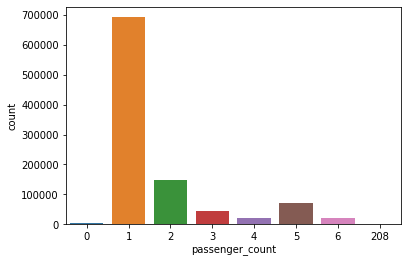

In [72]:
#Visualizing passenger count
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(uber_df['passenger_count'])
#Observation:
#Majority of the passenger count is from 1-6
#Passenger count with 0 and 208 can be considered as outliers and removed

In [73]:
#Removing outliers
uber_df=uber_df[(uber_df['passenger_count']>0) & (uber_df['passenger_count']<208)]
uber_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


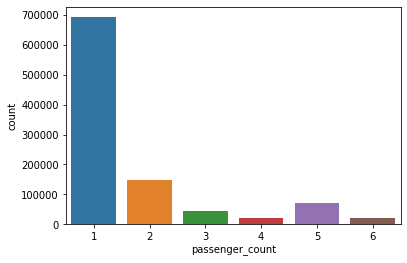

In [74]:
#Passenger count after removing outliers
sns.countplot(uber_df['passenger_count'])

In [75]:
#Removing outliers for latitude and longitude values
uber_df=uber_df[(uber_df['pickup_latitude']>-90) & (uber_df['pickup_latitude']<90) & (uber_df['dropoff_latitude']>-90) & (uber_df['dropoff_latitude']<90)
               & (uber_df['pickup_longitude']>-180) & (uber_df['pickup_longitude']<180) & (uber_df['dropoff_longitude']>-180) & (uber_df['dropoff_longitude']<180)]
uber_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [76]:
uber_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996356.000000,996356.000000,996356.000000,996356.000000,996356.000000,996356.000000
mean,11.357810,-72.516490,39.926221,-72.514780,39.925543,1.690745
std,9.831117,10.396739,6.092284,10.399257,6.096005,1.306168
min,0.000000,-128.175950,-74.016587,-121.391248,-74.035197,1.000000
25%,6.000000,-73.992059,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967091,40.767152,-73.963648,40.768127,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000


In [77]:
#Calculating distance between pickup and dropoff locations
from math import radians, cos, sin, asin, sqrt 
def dist(lat1, lat2, lon1, lon2): 
      
    # Converting degrees to radians. 
    lat1 = radians(lat1) 
    lat2 = radians(lat2)
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [78]:
#Creating distance column
list=[]
for i in uber_df.index:
    list.append(dist(uber_df.pickup_latitude[i],uber_df.dropoff_latitude[i],uber_df.pickup_longitude[i],uber_df.dropoff_longitude[i]))

list[0:5]

[1.030763935048818,
 8.450133595805992,
 1.3895252257697308,
 2.799270239983498,
 1.9991567879958214]

In [79]:
#Appending distance column
uber_df=pd.concat([uber_df,pd.DataFrame(list,index=uber_df.index,columns=['distance'])],axis=1)
uber_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1,1.879763
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2,0.000000
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5,1.761741
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1,1.842683


In [80]:
uber_df.describe()
#Observations:
#Minimum value of distance is 0 and can be removed

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,996356.000000,996356.000000,996356.000000,996356.000000,996356.000000,996356.000000,996356.000000
mean,11.357810,-72.516490,39.926221,-72.514780,39.925543,1.690745,18.705045
std,9.831117,10.396739,6.092284,10.399257,6.096005,1.306168,358.110265
min,0.000000,-128.175950,-74.016587,-121.391248,-74.035197,1.000000,0.000000
25%,6.000000,-73.992059,40.734960,-73.991383,40.734043,1.000000,1.213043
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000,2.116514
75%,12.500000,-73.967091,40.767152,-73.963648,40.768127,2.000000,3.883792
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000,12594.704725


In [117]:
#Removing 0 distance rows
uber_df=uber_df[uber_df['distance']>0]
uber_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,Weekday,Month_Name,Time_int
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,Monday,June,62781
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,Tuesday,January,60736
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,Thursday,August,2100
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,Saturday,April,16242
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,Tuesday,March,28260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,6.433776,2014,6,6,Sunday,June,82675
999995,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,1.879763,2014,9,5,Saturday,September,78278
999997,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,1.761741,2013,4,4,Friday,April,50580
999998,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,1.842683,2011,7,4,Friday,July,1740


In [82]:
#Useful information such as Year,day of the week and time of the day can be extracted from the Datetime column to use in our model
#Changing object type to datetime
uber_df['pickup_datetime']=pd.to_datetime(uber_df['pickup_datetime'])
uber_df['pickup_datetime'].head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [83]:
#Separating date and time
uber_df['Year']=uber_df['pickup_datetime'].apply(lambda x:x.year)
uber_df['Month']=uber_df['pickup_datetime'].apply(lambda x:x.month)
uber_df['Day']=uber_df['pickup_datetime'].apply(lambda x:x.weekday)
#0 is Monday and 6 is Sunday

In [84]:
#Fetching weekday and month name
import calendar
uber_df['Weekday']=uber_df['Day'].apply(lambda x:calendar.day_name[x])
uber_df['Month_Name']=uber_df['Month'].apply(lambda x:calendar.month_name[x])

In [85]:
#Converting time to integer value
#Function to convert time to integer
def time_int(h,m,s):
    return h*3600+m*60+s

#Converting time to seconds
uber_df['Time_int']=uber_df['pickup_datetime'].apply(lambda x:time_int(x.hour,x.minute,x.second))

In [86]:
uber_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,Weekday,Month_Name,Time_int
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,Monday,June,62781
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,Tuesday,January,60736
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,Thursday,August,2100
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,Saturday,April,16242
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,Tuesday,March,28260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,1.879763,2014,9,5,Saturday,September,78278
999996,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,0.000000,2010,9,0,Monday,September,53437
999997,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,1.761741,2013,4,4,Friday,April,50580
999998,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,1.842683,2011,7,4,Friday,July,1740


In [87]:
#Encoding year, month name and weekday using one-hot encoding
dummy=pd.get_dummies(uber_df[['Weekday','Month_Name']])
dummy

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_Name_April,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_June,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
999996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
999997,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
999998,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [88]:
#Normalizing selected columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Normalized_uber_df=scaler.fit_transform(uber_df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'Year','Time_int']])
Normalized_uber_df=pd.DataFrame(Normalized_uber_df,columns=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'Year','Time_int'],index=uber_df.index)
Normalized_uber_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Time_int
0,0.321439,0.800032,0.284775,0.737711,0.0,0.000082,0.000000,0.726640
1,0.320423,0.799962,0.283950,0.738159,0.0,0.000671,0.166667,0.702971
2,0.320620,0.800311,0.283878,0.737957,0.2,0.000110,0.333333,0.024306
3,0.320594,0.800115,0.283877,0.738005,0.0,0.000222,0.500000,0.187988
4,0.320707,0.800358,0.284086,0.738170,0.0,0.000159,0.166667,0.327087
...,...,...,...,...,...,...,...,...
999995,0.320656,0.800481,0.284070,0.738115,0.0,0.000149,0.833333,0.906006
999996,0.320565,0.799684,0.283873,0.737448,0.2,0.000000,0.166667,0.618491
999997,0.320646,0.800240,0.283866,0.738032,0.8,0.000140,0.666667,0.585423
999998,0.320634,0.800298,0.283965,0.737909,0.0,0.000146,0.333333,0.020139


In [118]:
#Separating feature and target variables
#x=pd.concat([Normalized_uber_df,dummy],axis=1)
x=uber_df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'Year','Month','Day','Time_int']]
y=uber_df[['fare_amount']]

In [119]:
#Creating train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(677550, 10)
(290379, 10)
(677550, 1)
(290379, 1)


In [120]:
#Building Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
uber_lin_reg_model=lr.fit(x_train,y_train)
y_pred=uber_lin_reg_model.predict(x_test)
y_pred[0:10]

array([[12.23676401],
       [10.82726083],
       [10.0726077 ],
       [11.62794604],
       [ 9.83939929],
       [12.17630919],
       [13.05444645],
       [11.88933618],
       [12.85410764],
       [11.32416822]])

In [121]:
#Model Evaluation
import numpy as np
from sklearn import metrics
print("Accuracy Score:",metrics.r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy Score: 0.015745782444332446
RMSE: 9.601292956759787


In [122]:
#Building XGBoost model
import xgboost as xgb
D_train=xgb.DMatrix(x_train,label=y_train)
D_test=xgb.DMatrix(x_test)

In [123]:
##Creating parameters for xgboost--initializing parameters
param={
    'eta':0.2,
    'max_depth':5,
    'objective':'reg:squarederror',
    'subsample':0.5,
    'colsample_bytree':0.5,
    #'alpha':10
}

In [124]:
#Training xgboost model
uber_xgboost_model=xgb.train(param,D_train,100)

In [125]:
#Predictions
y_pred=uber_xgboost_model.predict(D_test)
y_pred[0:10]

array([15.725816 ,  5.4294424,  5.732296 ,  6.743849 , 13.496228 ,
        5.7351713,  7.024056 ,  7.136258 , 20.402225 , 10.095054 ],
      dtype=float32)

In [126]:
#Model Evaluation
import numpy as np
from sklearn import metrics
print("Accuracy Score:",metrics.r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy Score: 0.8349562031433246
RMSE: 3.9316575368209854


In [127]:
#Light GBM
import lightgbm as lgb

params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

train_set = lgb.Dataset(x_train, y_train, silent=True)
lb = lgb.train(params, train_set = train_set, num_boost_round=300)
y_pred = lb.predict(x_test, num_iteration = lb.best_iteration)

print("Accuracy Score:",metrics.r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy Score: 0.8354244520386529
RMSE: 3.9260762851498647


In [37]:
#Predictions on test dataset
#importing uber test dataset
uber_test_df=pd.read_csv('E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Course End Projects/Project 9.1 - Uber Fare Prediction/Dataset for the project/test.csv')
uber_test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [38]:
#Exploring test data
uber_test_df.info()
#Observation:
#No null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


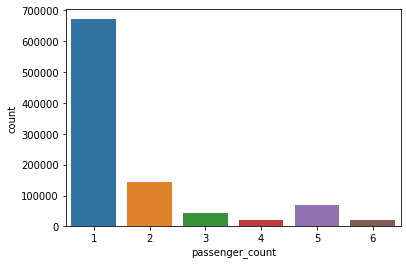

In [39]:
sns.countplot(uber_df['passenger_count'])
#Observation:
#Passenger count is from 1-6

In [40]:
uber_test_df.describe()
#Observations:
#Ranges of latitude and longitude are valid

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [42]:
#Creating distance column
list1=[]
for i in uber_test_df.index:
    list1.append(dist(uber_test_df.pickup_latitude[i],uber_test_df.dropoff_latitude[i],uber_test_df.pickup_longitude[i],uber_test_df.dropoff_longitude[i]))

list1[0:5]

[2.3232596603543234,
 2.425352984891254,
 0.6186278709678759,
 1.9610325158768023,
 5.387301253820666]

In [47]:
#Appending distance column
uber_test_df=pd.concat([uber_test_df,pd.DataFrame(list1,index=uber_test_df.index,columns=['distance'])],axis=1)
uber_test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.387301
...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,2.124874
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,3.270969
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,19.183941
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,8.343486


In [50]:
#Useful information such as Year,day of the week and time of the day can be extracted from the Datetime column to use in our model
#Changing object type to datetime
uber_test_df['pickup_datetime']=pd.to_datetime(uber_test_df['pickup_datetime'])
uber_test_df['pickup_datetime'].head()

0   2015-01-27 13:08:24+00:00
1   2015-01-27 13:08:24+00:00
2   2011-10-08 11:53:44+00:00
3   2012-12-01 21:12:12+00:00
4   2012-12-01 21:12:12+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [51]:
#Separating date and time
uber_test_df['Year']=uber_df['pickup_datetime'].apply(lambda x:x.year)
uber_test_df['Month']=uber_df['pickup_datetime'].apply(lambda x:x.month)
uber_test_df['Day']=uber_df['pickup_datetime'].apply(lambda x:x.weekday)
#0 is Monday and 6 is Sunday

In [52]:
#Fetching weekday and month name
import calendar
uber_test_df['Weekday']=uber_df['Day'].apply(lambda x:calendar.day_name[x])
uber_test_df['Month_Name']=uber_df['Month'].apply(lambda x:calendar.month_name[x])

In [53]:
#Converting time to integer value(seconds)
uber_test_df['Time_int']=uber_test_df['pickup_datetime'].apply(lambda x:time_int(x.hour,x.minute,x.second))

In [54]:
uber_test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,Weekday,Month_Name,Time_int
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2009.0,6.0,0.0,Monday,June,47304
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2010.0,1.0,1.0,Tuesday,January,47304
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011.0,8.0,3.0,Thursday,August,42824
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012.0,4.0,5.0,Saturday,April,76332
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2010.0,3.0,1.0,Tuesday,March,76332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2.124874,2014.0,12.0,6.0,Sunday,December,45471
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,3.270969,2015.0,5.0,4.0,Friday,May,61551
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,19.183941,2009.0,4.0,2.0,Wednesday,April,74655
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,8.343486,2009.0,4.0,3.0,Thursday,April,3919


In [55]:
#Encoding year, month name and weekday using one-hot encoding
dummy=pd.get_dummies(uber_test_df[['Weekday','Month_Name']])
dummy

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_Name_April,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_June,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9911,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9912,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
#Normalizing selected columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Normalized_uber_test_df=scaler.fit_transform(uber_test_df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'Year','Time_int']])
Normalized_uber_test_df=pd.DataFrame(Normalized_uber_df,columns=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'Year','Time_int'],index=uber_test_df.index)
Normalized_uber_test_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Time_int
0,0.220338,0.167776,0.221502,0.155060,0.0,0.023234,0.000000,0.548049
1,0.209638,0.128686,0.207781,0.150950,0.0,0.024254,0.166667,0.548049
2,0.213066,0.156736,0.222898,0.157102,0.0,0.006187,0.333333,0.496142
3,0.214143,0.171297,0.214414,0.161976,0.0,0.019611,0.500000,0.884379
4,0.226085,0.190628,0.215894,0.155584,0.0,0.053875,0.166667,0.884379
...,...,...,...,...,...,...,...,...
9909,0.224443,0.196983,0.241770,0.187473,1.0,0.021250,0.833333,0.526811
9910,0.242310,0.202794,0.238178,0.183911,1.0,0.032711,1.000000,0.713120
9911,0.205895,0.135044,0.372167,0.069200,1.0,0.191847,0.000000,0.864949
9912,0.210657,0.142808,0.254711,0.206399,1.0,0.083438,0.000000,0.045372


In [130]:
#Separating feature and target variables
#X_test=pd.concat([Normalized_uber_test_df,dummy],axis=1)
X_test=uber_test_df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'Year','Month','Day','Time_int']]
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,Time_int
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2009.0,6.0,0.0,47304
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2010.0,1.0,1.0,47304
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011.0,8.0,3.0,42824
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012.0,4.0,5.0,76332
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2010.0,3.0,1.0,76332
...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2.124874,2014.0,12.0,6.0,45471
9910,-73.945511,40.803600,-73.960213,40.776371,6,3.270969,2015.0,5.0,4.0,61551
9911,-73.991600,40.726608,-73.789742,40.647011,6,19.183941,2009.0,4.0,2.0,74655
9912,-73.985573,40.735432,-73.939178,40.801731,6,8.343486,2009.0,4.0,3.0,3919


In [131]:
#Predictions using XGBoost
D_test=xgb.DMatrix(X_test)

In [132]:
#Predictions
y_pred=uber_xgboost_model.predict(D_test)
y_pred[0:10]

array([ 8.3568   ,  8.401362 ,  5.0536776,  7.5740366, 13.190306 ,
        9.706359 ,  6.255348 , 50.54836  , 12.988825 ,  6.054131 ],
      dtype=float32)

In [133]:
#Output--Key and Predicted fare
fare_pred=pd.concat([uber_test_df['key'],pd.DataFrame(y_pred,columns=['fare_amount'])],axis=1)
fare_pred

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.356800
1,2015-01-27 13:08:24.0000003,8.401362
2,2011-10-08 11:53:44.0000002,5.053678
3,2012-12-01 21:12:12.0000002,7.574037
4,2012-12-01 21:12:12.0000003,13.190306
...,...,...
9909,2015-05-10 12:37:51.0000002,8.552841
9910,2015-01-12 17:05:51.0000001,12.569479
9911,2015-04-19 20:44:15.0000001,46.126625
9912,2015-01-31 01:05:19.0000005,16.384842


In [134]:
#Loading output to a csv file
fare_pred.to_csv(r'E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Course End Projects/Project 9.1 - Uber Fare Prediction/Dataset for the project/Praveen_fare_Submission_xgb_1.csv',index=False)

In [135]:
#Predictions using light GBM
y_pred = lb.predict(X_test, num_iteration = lb.best_iteration)
y_pred[0:10]

array([ 7.6945837 ,  8.88224398,  5.01438435,  7.02203825, 12.48942932,
        8.67036437,  6.5652058 , 48.82086893, 12.72448261,  6.80364733])

In [136]:
#Output--Key and Predicted fare
fare_pred=pd.concat([uber_test_df['key'],pd.DataFrame(y_pred,columns=['fare_amount'])],axis=1)
fare_pred

,key,fare_amount
0,2015-01-27 13:08:24.0000002,7.694584
1,2015-01-27 13:08:24.0000003,8.882244
2,2011-10-08 11:53:44.0000002,5.014384
3,2012-12-01 21:12:12.0000002,7.022038
4,2012-12-01 21:12:12.0000003,12.489429
...,...,...
9909,2015-05-10 12:37:51.0000002,8.808210
9910,2015-01-12 17:05:51.0000001,13.473278
9911,2015-04-19 20:44:15.0000001,39.696872
9912,2015-01-31 01:05:19.0000005,15.961837


In [137]:
#Loading output to a csv file
fare_pred.to_csv(r'E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Course End Projects/Project 9.1 - Uber Fare Prediction/Dataset for the project/Praveen_fare_Submission_lgbm_1.csv',index=False)

In [139]:
#Regression using Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
estimator.fit(x_train,y_train)
y_pred=estimator.predict(x_test)
y_pred[0:10]

array([12.701094, 11.204876, 11.511507, 12.226752, 12.566868, 11.570011,
       11.841853, 11.273135, 11.926405, 11.167917], dtype=float32)

In [140]:
#Model Evaluation
print("Accuracy Score:",metrics.r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy Score: -0.0009973430030996155
RMSE: 9.682612269708605


In [141]:
#K-Fold Cross Validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x.values, y.values, cv=kfold, n_jobs=1)
print("RMSE:", np.sqrt(results.std()))

C:\Users\bpk20\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RMSE: 1.8311567568116853
